<a href="https://colab.research.google.com/github/lakshmirkishtipati/MachineLearning/blob/master/LinearRegression/IrisData/Linear_Regression_(Iris_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
!pip install -q xlrd
!git clone https://github.com/lakshmirkishtipati/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 105, done.
remote: Total 105 (delta 0), reused 0 (delta 0), pack-reused 105
Receiving objects: 100% (105/105), 1.42 MiB | 14.65 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
!ls MachineLearning/LinearRegression/IrisData

 iris.csv
'Iris data desc Linear regression.txt'
 Linear_regression_iris_assignment_Solution.ipynb
'Linear_Regression_(Iris_Data).ipynb'


In [4]:
#Read the data from Git
iris_df = pd.read_csv('MachineLearning/LinearRegression/IrisData/iris.csv')
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris_df.isnull().astype('int').sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

### There are no missing values in the dataset

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

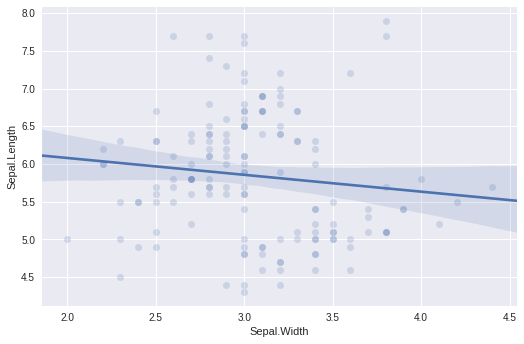

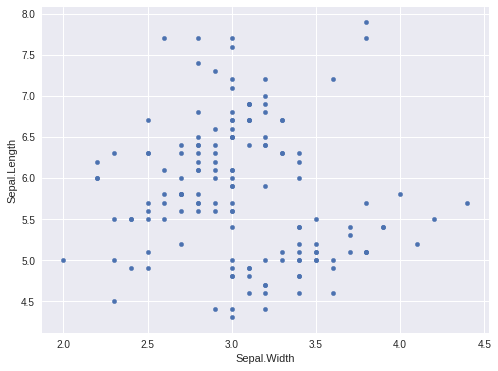

In [0]:
sns.lmplot(x='Sepal.Width', y='Sepal.Length', data=iris_df, aspect=1.5, scatter_kws={'alpha':0.2})
iris_df.plot(kind='scatter',x='Sepal.Width',y = 'Sepal.Length')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


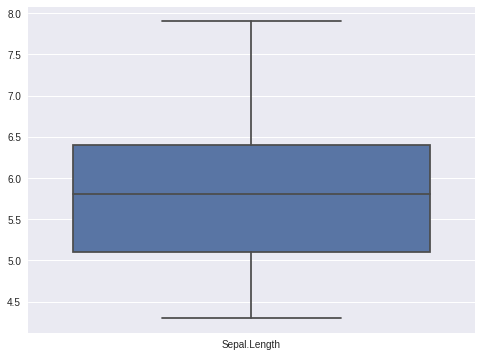

In [0]:
sns.boxplot(iris_df[['Sepal.Length']])

In [0]:
x = iris_df[['Sepal.Width','Petal.Length','Petal.Width']]
y = iris_df['Sepal.Length']
linreg = LinearRegression()
linreg.fit(x,y)
print(linreg.coef_)
print(linreg.intercept_)

[ 0.65083716  0.70913196 -0.55648266]
1.855997492917545


### *   Keeping everything constant if you increase Sepal.Width by 1 cm, the Sepal.Length will get increased by 0.65 cm.

### *   Keeping everything constant if we increase Petal.Length by 1cm, teh Sepal.Length will get increase by 0.70 cm.


### *   Keeping everything constant if we increase Petal.Width by 1cm, teh Sepal.Length will get decrease by 0.55 cm.




In [0]:
def train_test_iris_rmse(feature_cols):
  x = iris_df[feature_cols]
  y = iris_df['Sepal.Length']
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
  linreg = LinearRegression()
  linreg.fit(x_train,y_train)
  y_pred = linreg.predict(x_test)
  return np.sqrt(metrics.mean_squared_error(y_pred,y_test))

In [0]:
feature_cols = ['Sepal.Width','Petal.Length','Petal.Width']
train_test_iris_rmse(feature_cols)

0.29165289417303597

In [0]:
#Check for multicollinearity
corr = np.corrcoef(x, rowvar=0)
corr

array([[ 1.        , -0.4284401 , -0.36612593],
       [-0.4284401 ,  1.        ,  0.96286543],
       [-0.36612593,  0.96286543,  1.        ]])

In [0]:
feature_cols = ['Sepal.Width','Petal.Length','Petal.Width']

x = iris_df[feature_cols]
y = iris_df['Sepal.Length']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 3)
(105,)
(45, 3)
(45,)


In [0]:
# Buliding Linear Model with algorithm
linreg = LinearRegression()
model = linreg.fit(x_train,y_train)
predicted = linreg.predict(x_test)

In [0]:
# Coeff. of determination og R squared value
print(model.score(x_train,y_train))

0.8699757930391768


In [0]:
## R Squared value or coefficient of determination
print(metrics.r2_score(y_test,predicted))

0.8270147270673942


In [0]:
print(model.intercept_)
print(model.coef_)

1.9500195594719694
[ 0.61271799  0.69930895 -0.53094114]


In [0]:
# predict the x_test with model
predicted = linreg.predict(x_test)

In [0]:
# Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test,predicted))

0.3492365241051055

In [0]:
## Mean Absolute Error
print(metrics.mean_absolute_error(y_test,predicted))

0.28799237071916595


In [0]:
# Compute NULL RMSE
feature_cols = ['Sepal.Width','Petal.Length','Petal.Width']
output_var = ['Sepal.Length']

x = iris_df[feature_cols]
y = iris_df[output_var]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)

# to convert (5,1) to (5,)
y_test = np.ravel(y_test)
#Create a Numpy array with same size as of y_test
y_null = np.zeros_like(y_test,dtype=float)

#Fill with mean value of y_test

y_null.fill(y_test.mean())

y_test


array([5. , 6.4, 6.7, 7.7, 6.4, 6.3, 6.3, 5.1, 4.9, 6. , 5.1, 5.6, 7.1,
       5.5, 6.2, 6.7, 5.9, 6.7, 4.8, 5.9, 6.3, 4.7, 6.1, 5.2, 7.7, 7. ,
       6.3, 6.1, 6.6, 5.3, 5.2, 4.3, 6. , 6.7, 6.9, 6.1, 5.7, 5.1, 5.7,
       5. , 5. , 5.5, 6. , 5.4, 4.9])

In [0]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.7915728989303434

In [0]:
#help(pd.get_dummies)
species_dummies = pd.get_dummies(iris_df['Species'],prefix = 'Species')
species_dummies.head()

,Species_setosa,Species_versicolor,Species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [0]:
iris_df = pd.concat([iris_df,species_dummies],axis=1)
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_setosa,Species_versicolor,Species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [0]:
iris_df.drop(['Species_setosa'],axis=1,inplace=True)

In [0]:
feature_cols = ['Species_versicolor','Species_virginica']
train_test_iris_rmse(feature_cols)

0.5577703573942075

In [0]:
# Analyzing the dummy columns
feature_cols = ['Species_versicolor','Species_virginica']
x = iris_df[feature_cols]
y = iris_df['Sepal.Length']
x_train,x_test,y_train,y_test = train_test_split(x,y)
linreg = LinearRegression()
linreg.fit(x,y)
y_pred = linreg.predict(x_test)
print(linreg.coef_)
print(linreg.intercept_)

[0.93  1.582]
5.006
